# Classification of emotions

## Importing the libraries

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting un

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import save_model

## Loading the images

In [3]:
path='fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Train and test set

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=7,
                                     horizontal_flip=True,
                                     zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('fer2013/train',
                                                       target_size=(128, 128),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       shuffle=True)

Found 28709 images belonging to 7 classes.


In [5]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('fer2013/validation',
                                                       target_size=(128, 128),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       shuffle=False)

Found 3589 images belonging to 7 classes.


In [6]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [7]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

## Building and training the convolutional neural network

In [8]:
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/

num_detectors = 32 # feature detectors
num_classes = 7
width, height = 128, 128
epochs = 100

model = Sequential()
model.add(Conv2D(num_detectors, (3,3), activation='relu', padding='same', input_shape=(width,height,3)))
model.add(BatchNormalization()) # Normalize Conv2D
model.add(Conv2D(num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(4*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(4*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(8*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(8*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1153, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1153, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                        

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_dataset, epochs=20)

Epoch 1/20
1795/1795 [==============================] - 121s 61ms/step - loss: 1.9813 - accuracy: 0.2767
Epoch 2/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.6707 - accuracy: 0.3709
Epoch 3/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.4889 - accuracy: 0.4384
Epoch 4/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.3725 - accuracy: 0.4803
Epoch 5/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.2935 - accuracy: 0.5114
Epoch 6/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.2449 - accuracy: 0.5340
Epoch 7/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.1967 - accuracy: 0.5500
Epoch 8/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.1715 - accuracy: 0.5587
Epoch 9/20
1795/1795 [==============================] - 109s 61ms/step - loss: 1.1532 - accuracy: 0.5647
Epoch 10/20
1795/1795 [==============================] 

## Evaluating the neural network

In [12]:
model.evaluate(test_dataset)

225/225 [==============================] - 3s 11ms/step - loss: 1.4026 - accuracy: 0.5497


[1.402583360671997, 0.5497353076934814]

In [13]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)

225/225 [==============================] - 3s 11ms/step


In [14]:
accuracy_score(test_dataset.classes, predictions)

0.5497353023126219

In [15]:
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[245,   5,  29,  28,  71,  99,  14],
       [ 17,  25,   3,   1,   1,   6,   2],
       [ 59,   2, 172,  22,  75, 133,  65],
       [ 24,   1,  11, 749,  46,  36,  12],
       [ 80,   4,  68, 147, 133, 128,  66],
       [ 47,   3,  39,  27, 116, 356,   6],
       [ 10,   1,  48,  31,  21,  12, 293]])

<Axes: >

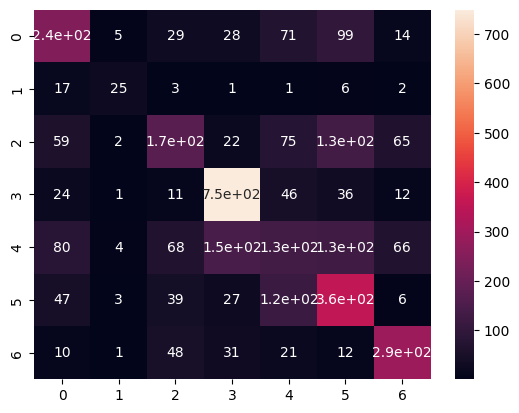

In [16]:
sns.heatmap(cm, annot=True)

In [17]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50       491
           1       0.61      0.45      0.52        55
           2       0.46      0.33      0.38       528
           3       0.75      0.85      0.80       879
           4       0.29      0.21      0.24       626
           5       0.46      0.60      0.52       594
           6       0.64      0.70      0.67       416

    accuracy                           0.55      3589
   macro avg       0.53      0.52      0.52      3589
weighted avg       0.53      0.55      0.53      3589



## Saving and loading the model

In [18]:
model_json = model.to_json()
with open('model_emotions.json','w') as json_file:
  json_file.write(model_json)

In [19]:
network_saved = save_model(model, '/content/weights_emotions.hdf5')

In [20]:
with open('model_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001

In [21]:
model_loaded = tf.keras.models.model_from_json(json_saved_model)
model_loaded.load_weights('weights_emotions.hdf5')
model_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                        

## Classifying one single image

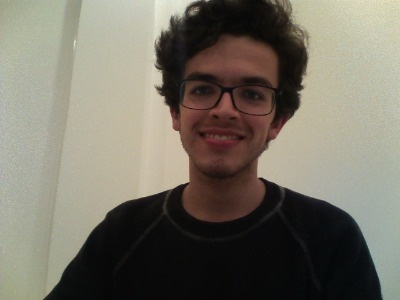

In [23]:
image = cv2.imread('gabriel.png')
cv2_imshow(image)

In [24]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [25]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)
faces

array([[162,  40, 128, 128]], dtype=int32)

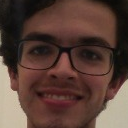

In [26]:
roi = image [40 : 40+128, 162 : 162+128]
cv2_imshow(roi)

In [27]:
roi.shape

(128, 128, 3)

In [29]:
roi = roi / 255
roi = np.expand_dims(roi, axis=0)
roi.shape

(1, 128, 128, 3)

In [30]:
probs = model.predict(roi)
result = np.argmax(probs)
result

1/1 [==============================] - 0s 384ms/step


2

## Classifying multiple images

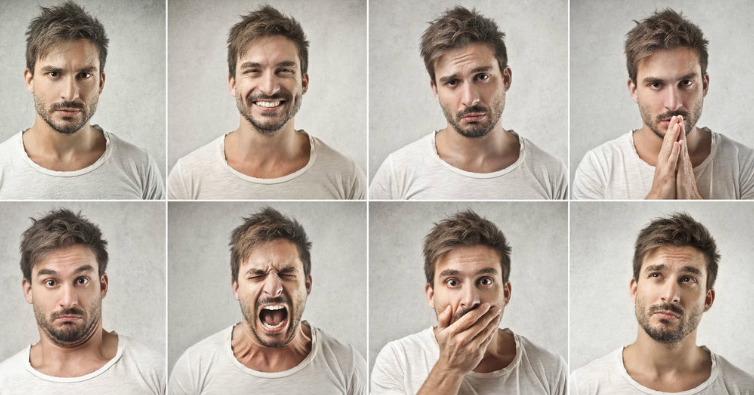

In [31]:
image = cv2.imread('faces_emotions.png')
cv2_imshow(image)

In [32]:
faces = face_detector.detectMultiScale(image)
faces

array([[625,  49,  91,  91],
       [224,  35,  90,  90],
       [ 23,  41,  92,  92],
       [420,  43,  97,  97],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [33]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [34]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 20ms/step


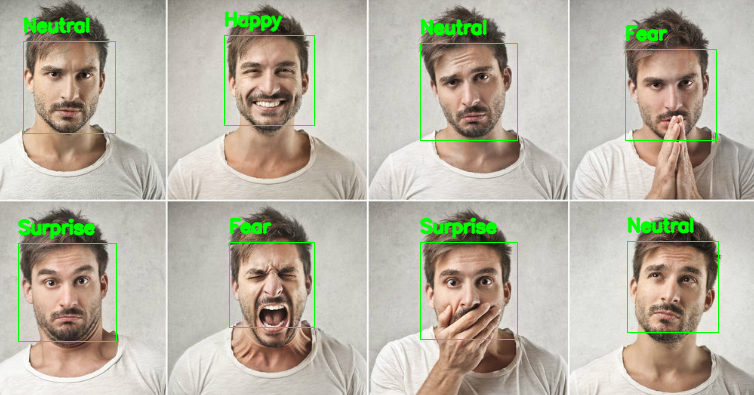

In [35]:
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
  roi = image[y : y+h, x : x+w]
  roi = cv2.resize(roi, (128, 128))
  roi = roi / 255
  roi = np.expand_dims(roi, axis=0)
  prediction = model.predict(roi)
  prediction = np.argmax(prediction)
  cv2.putText(image, emotions[prediction], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image)

## Classifying emotions in videos

In [44]:
cap = cv2.VideoCapture('emotion_test01.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [45]:
save_path = './'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [46]:
while cv2.waitKey(1) < 0:
  connected, frame = cap.read()
  if not connected:
    break
  faces = face_detector.detectMultiScale(frame, scaleFactor = 1.2, minNeighbors=5, minSize=(30, 30))
  if len(faces) > 0:
    for (x, y, w, h) in faces:
      frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 1)
      roi = frame[y : y+h, x : x+w]
      roi = cv2.resize(roi, (128, 128))
      roi = roi / 255
      roi = np.expand_dims(roi, axis=0)
      prediction = model.predict(roi)

      if prediction is not None:
        prediction = np.argmax(prediction)
        cv2.putText(frame, emotions[prediction], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    cv2_imshow(frame)
    output_video.write(frame)

print('End')
output_video.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.